In [ ]:
NAME:YUVARAJ JOSHITHA 
REGGISTER NO:212223240189
DEPARTMENT:AIML

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

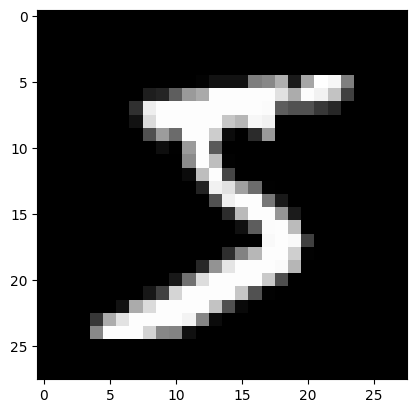

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

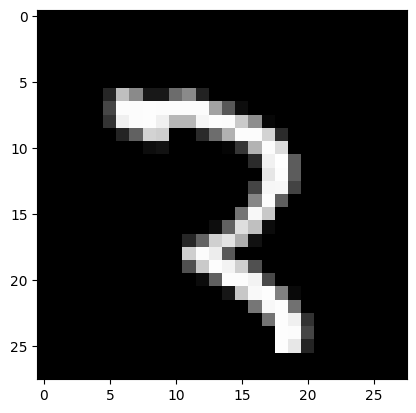

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')



In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 16)                86544     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 87034 (339.98 KB)
Trainable params: 87034 (339.98 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 8s 5ms/step - loss: 0.3115 - accuracy: 0.9060 - val_loss: 0.1325 - val_accuracy: 0.9591
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0963 - accuracy: 0.9720 - val_loss: 0.0785 - val_accuracy: 0.9766
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0706 - accuracy: 0.9791 - val_loss: 0.0671 - val_accuracy: 0.9789
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0574 - accuracy: 0.9832 - val_loss: 0.0573 - val_accuracy: 0.9811
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0480 - accuracy: 0.9854 - val_loss: 0.0580 - val_accuracy: 0.9813


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.311452,0.905967,0.132476,0.9591
1,0.096275,0.971967,0.078508,0.9766
2,0.070584,0.979067,0.067120,0.9789
3,0.057365,0.983183,0.057346,0.9811
4,0.048038,0.985383,0.057969,0.9813


<Axes: >

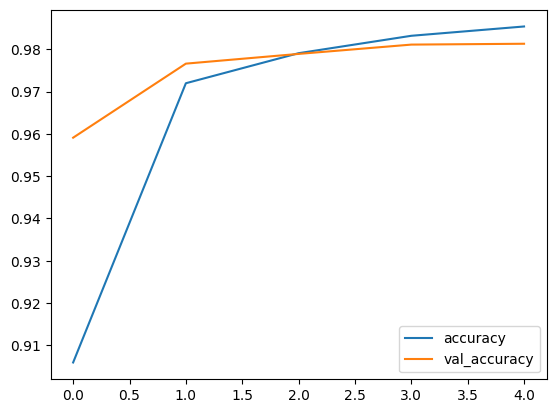

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

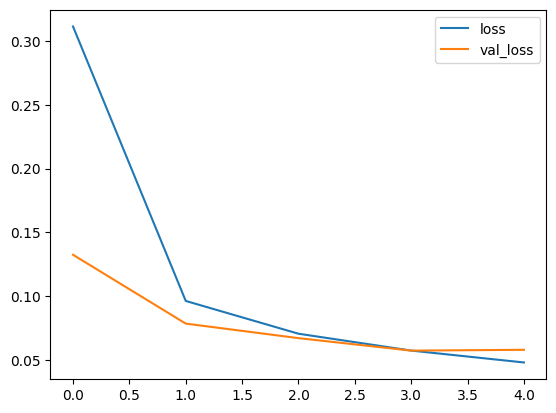

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 970    0    2    0    0    3    3    1    1    0]
 [   0 1130    2    1    0    0    1    0    1    0]
 [   0    3 1019    0    3    0    0    6    1    0]
 [   0    0    2 1000    0    3    0    3    2    0]
 [   0    2    2    0  972    0    2    0    0    4]
 [   2    0    0    9    0  873    7    1    0    0]
 [   6    3    0    0    2    1  944    0    2    0]
 [   0    5   12    4    2    0    0 1004    1    0]
 [   5    0    7    3    4    1    3    4  943    4]
 [   4    5    2    7   12    4    0   12    5  958]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
img = image.load_img('/content/image four.jpg')



In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('/content/image four.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 89ms/step


In [ ]:
print(x_single_prediction)

[3]


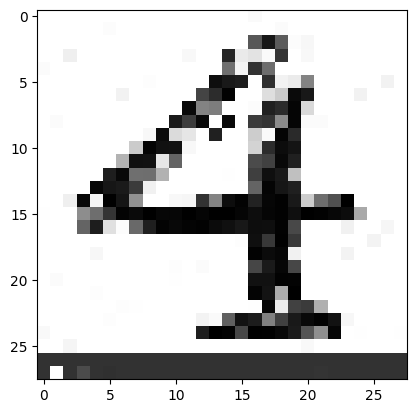

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 26ms/step


In [ ]:
print(x_single_prediction)

[4]
